In [26]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def create_model_df(model_name):
    data_dir = os.path.join('..','group_evals','data')

    records = []
    for training_data_f in os.listdir(data_dir):
        if model_name not in training_data_f:
            continue
        h_type = training_data_f.split('_')[-2][-1]
        p_type = training_data_f.split('_')[-1].split('.')[0].split('p')[1]
        print(p_type)
        with open(os.path.join(data_dir, f'{model_name}_h{h_type}_p{p_type}.json')) as f:
            preds = json.load(f)

        true = np.load(os.path.join('..','splits','test',f'y_preprocessed_h{0}_p{0}.npy'))
        record = {
            'type' : model_name,
            'halflife' : h_type,
            'ignored_percent' : p_type,
            'true' : np.argmax(true,axis=1).astype(int),
            'predictions' : preds['preds'],
            'params' : preds['params']
        }
        records.append(record)

    return pd.DataFrame.from_dict(records)



In [27]:

models = ['mlp', 'cnn', 'lstm_small', 'lstm_big', 'encoder_stack', 'encoder_block']
df = None

for model in models:
    model_df = create_model_df(model)
    if df is not None:
        df = pd.concat([df,model_df],axis=0,ignore_index=True)
    else:
        df = model_df

0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8


In [28]:
df[df.ignored_percent==13]

,type,halflife,ignored_percent,true,predictions,params


In [29]:
# len(df['predictions'].iloc[0][1])
df

,type,halflife,ignored_percent,true,predictions,params
0,mlp,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.850001335144043, 0.8475892543792725, 0.815...",3814
1,mlp,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.7790015339851379, 0.7607910633087158, 0.65...",3814
2,mlp,0,13,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.1975567489862442, 0.30684956908226013, 0.1...",3814
3,mlp,0,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.8838388323783875, 0.8119648694992065, 0.76...",3814
4,mlp,0,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.7939409613609314, 0.7332553267478943, 0.72...",3814
...,...,...,...,...,...,...
103,encoder_block,3,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.35378485918045044, 0.331289678812027, 0.54...",948
104,encoder_block,3,13,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.39686721563339233, 0.3846358358860016, 0.5...",948
105,encoder_block,3,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.2638995051383972, 0.21208065748214722, 0.3...",948
106,encoder_block,3,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.3301888108253479, 0.3323157727718353, 0.38...",948


In [30]:
from sklearn.metrics import accuracy_score


def create_accuracies_column(row):

    trues = row['true']
    preds = row['predictions']

    accs = []
    for pred in preds:
        sc = accuracy_score(trues,np.round(pred))
        accs.append(sc)
    return accs
df['accuracies'] = df.apply(lambda row : create_accuracies_column(row),axis=1)
df['params'] = df['params'].astype(int)
df['halflife'] = df['halflife'].astype(int)
df['ignored_percent'] = df['ignored_percent'].astype(int)

In [31]:
only_stats = df.loc[:,['type','halflife','ignored_percent','accuracies','params']]
only_stats.head(4)

,type,halflife,ignored_percent,accuracies,params
0,mlp,0,0,"[0.5362318840579711, 0.5090579710144928, 0.518...",3814
1,mlp,0,1,"[0.4945652173913043, 0.5416666666666666, 0.532...",3814
2,mlp,0,13,"[0.5271739130434783, 0.5108695652173914, 0.436...",3814
3,mlp,0,3,"[0.48731884057971014, 0.5271739130434783, 0.49...",3814


In [32]:
only_stats['median_acc'] = only_stats['accuracies'].apply(lambda ls : np.median(ls))
only_stats['variance_acc'] = only_stats['accuracies'].apply(lambda ls : np.std(ls))
only_stats

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc
0,mlp,0,0,"[0.5362318840579711, 0.5090579710144928, 0.518...",3814,0.520833,0.018299
1,mlp,0,1,"[0.4945652173913043, 0.5416666666666666, 0.532...",3814,0.515399,0.018265
2,mlp,0,13,"[0.5271739130434783, 0.5108695652173914, 0.436...",3814,0.490036,0.023768
3,mlp,0,3,"[0.48731884057971014, 0.5271739130434783, 0.49...",3814,0.510870,0.022070
4,mlp,0,5,"[0.48731884057971014, 0.5054347826086957, 0.53...",3814,0.506341,0.017909
...,...,...,...,...,...,...,...
103,encoder_block,3,1,"[0.5253623188405797, 0.5217391304347826, 0.536...",948,0.523551,0.009352
104,encoder_block,3,13,"[0.5108695652173914, 0.4746376811594203, 0.516...",948,0.516304,0.009117
105,encoder_block,3,3,"[0.5253623188405797, 0.5144927536231884, 0.523...",948,0.520833,0.008192
106,encoder_block,3,5,"[0.5235507246376812, 0.5163043478260869, 0.510...",948,0.518116,0.009970


<AxesSubplot:xlabel='median_acc', ylabel='variance_acc'>

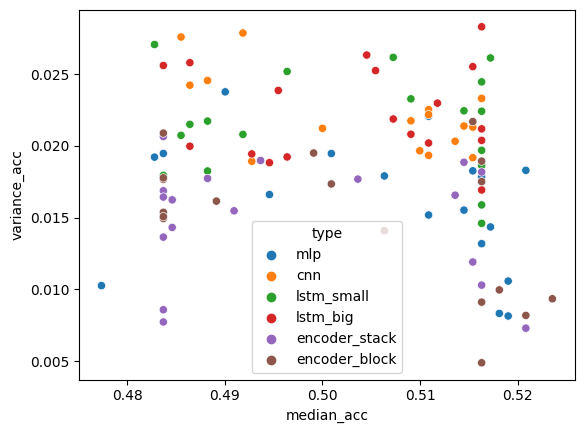

In [33]:
import seaborn as sns
sns.scatterplot(data=only_stats, x="median_acc", y="variance_acc", hue="type")

In [34]:
only_stats.groupby(['ignored_percent','type'])[['median_acc']].median()

median_acc
ignored_percent type                     
0               cnn              0.509964
                encoder_block    0.515399
                encoder_stack    0.503623
                lstm_big         0.511775
                lstm_small       0.516304
                mlp              0.518116
1               cnn              0.515399
                encoder_block    0.499094
                encoder_stack    0.493659
                lstm_big         0.516304
                lstm_small       0.509058
                mlp              0.517210
3               cnn              0.488225
                encoder_block    0.500906
                encoder_stack    0.484601
                lstm_big         0.495471
                lstm_small       0.516304
                mlp              0.510870
5               cnn              0.491848
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm_big         0.492754
                lstm_small       0.507246
                mlp              0.510870
8               cnn              0.509058
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm_big         0.486413
                lstm_small       0.486413
                mlp              0.482790
13              cnn              0.515399
                encoder_block    0.516304
                encoder_stack    0.513587
                lstm_big         0.510870
                lstm_small       0.491848
                mlp              0.490036

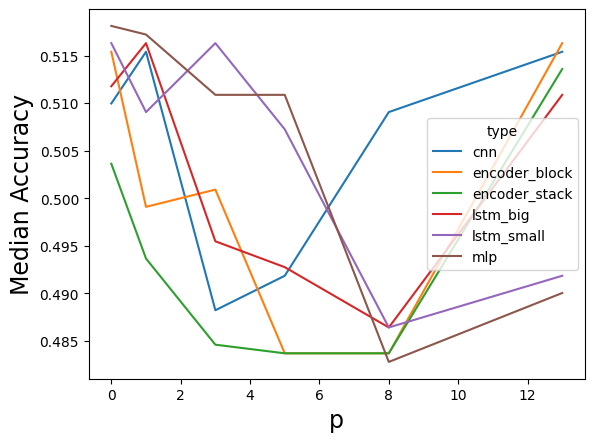

In [35]:
sns.lineplot(only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median().reset_index(),x='ignored_percent',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('p',fontsize=17)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/p_effect_on_models.png')

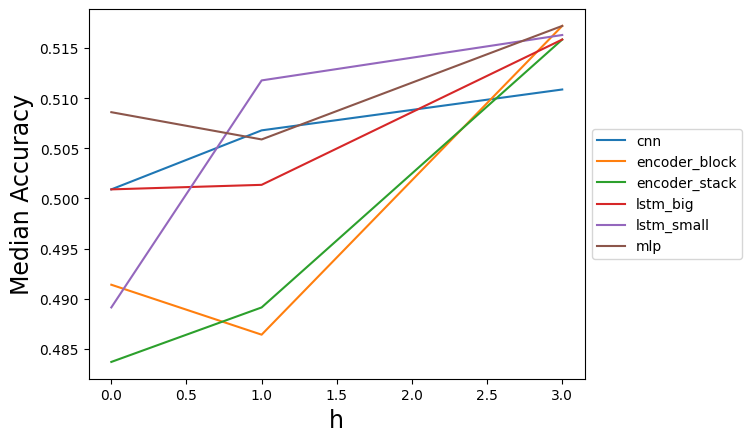

In [36]:
sns.lineplot(only_stats.groupby(by=['type','halflife'])[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('h',fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/h_effect_on_models.png')

In [37]:
only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median()

median_acc  variance_acc
type          ignored_percent                          
cnn           0                  0.509964      0.019663
              1                  0.515399      0.021312
              3                  0.488225      0.024560
              5                  0.491848      0.024234
              8                  0.509058      0.021749
              13                 0.515399      0.021388
encoder_block 0                  0.515399      0.014094
              1                  0.499094      0.016155
              3                  0.500906      0.017352
              5                  0.483696      0.015375
              8                  0.483696      0.018942
              13                 0.516304      0.014944
encoder_stack 0                  0.503623      0.015479
              1                  0.493659      0.008586
              3                  0.484601      0.011913
              5                  0.483696      0.018864
              8                  0.483696      0.016874
              13                 0.513587      0.016569
lstm_big      0                  0.511775      0.021877
              1                  0.516304      0.021188
              3                  0.495471      0.023866
              5                  0.492754      0.019980
              8                  0.486413      0.025604
              13                 0.510870      0.020814
lstm_small    0                  0.516304      0.018638
              1                  0.509058      0.017949
              3                  0.516304      0.026131
              5                  0.507246      0.022419
              8                  0.486413      0.021505
              13                 0.491848      0.020802
mlp           0                  0.518116      0.015527
              1                  0.517210      0.014355
              3                  0.510870      0.019470
              5                  0.510870      0.015188
              8                  0.482790      0.016612
              13                 0.490036      0.019473

In [38]:
only_stats['ignored_percent'].value_counts()

13    18
8     18
5     18
3     18
1     18
0     18
Name: ignored_percent, dtype: int64

In [39]:
only_stats.groupby(['halflife','type'])[['median_acc']].median()

median_acc
halflife type                     
0        cnn              0.500906
         encoder_block    0.491395
         encoder_stack    0.483696
         lstm_big         0.500906
         lstm_small       0.489130
         mlp              0.508605
1        cnn              0.506793
         encoder_block    0.486413
         encoder_stack    0.489130
         lstm_big         0.501359
         lstm_small       0.511775
         mlp              0.505888
3        cnn              0.510870
         encoder_block    0.517210
         encoder_stack    0.515851
         lstm_big         0.515851
         lstm_small       0.516304
         mlp              0.517210

<AxesSubplot:xlabel='halflife', ylabel='median_acc'>

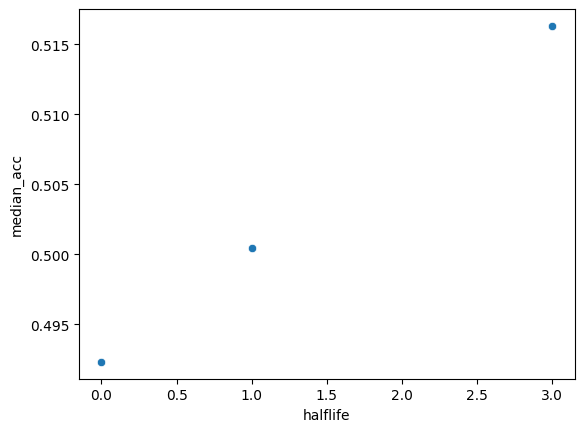

In [40]:
sns.scatterplot(only_stats.groupby('halflife')[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc')

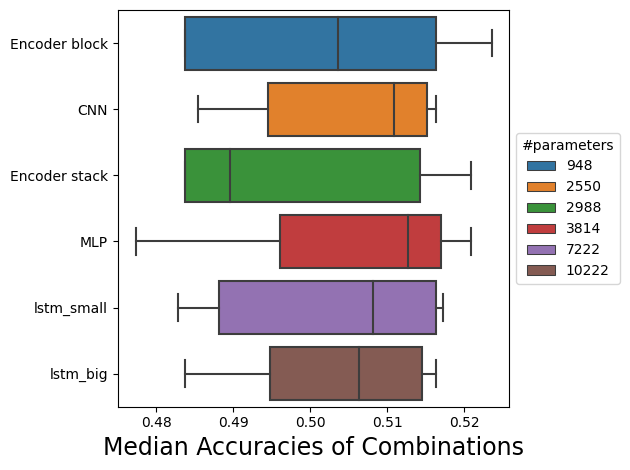

In [51]:
import matplotlib.pyplot as plt
g = sns.boxplot(data=only_stats.replace({'cnn':'CNN','encoder_block' : 'Encoder block','encoder_stack' : 'Encoder stack','mlp' : 'MLP','lstm':'LSTM'}).sort_values('params'), x="median_acc", y="type",hue='params',dodge=False)

plt.ylabel('')
plt.xlabel('Median Accuracies of Combinations',fontsize=17)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.get_legend().set_title("#parameters")
plt.tight_layout()
plt.savefig('../documents/figures/global_accs.png')

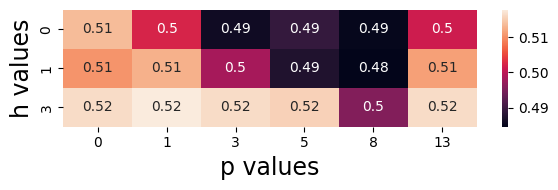

In [49]:
tmp = only_stats.groupby(['halflife','ignored_percent'])[['median_acc']].median()
tmp=tmp.reset_index().pivot('halflife','ignored_percent','median_acc')

fig,ax=plt.subplots(1,1,figsize=(6,2))
sns.heatmap(tmp,annot=True)
plt.ylabel("h values",fontsize=17)
plt.xlabel("p values",fontsize=17)
plt.tight_layout()
plt.savefig('../documents/figures/p_vs_h.png')

In [43]:
from sklearn.metrics import roc_auc_score

def create_auc_column(row):

    trues = row['true']
    preds = row['predictions']

    aucs = []
    for pred in preds:
        sc = roc_auc_score(trues,pred)
        aucs.append(sc)
    return np.median(aucs)
only_stats['aucs'] = df.apply(lambda row : create_auc_column(row),axis=1)
only_stats.head()

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc,aucs
0,mlp,0,0,"[0.5362318840579711, 0.5090579710144928, 0.518...",3814,0.520833,0.018299,0.521039
1,mlp,0,1,"[0.4945652173913043, 0.5416666666666666, 0.532...",3814,0.515399,0.018265,0.522498
2,mlp,0,13,"[0.5271739130434783, 0.5108695652173914, 0.436...",3814,0.490036,0.023768,0.492759
3,mlp,0,3,"[0.48731884057971014, 0.5271739130434783, 0.49...",3814,0.510870,0.022070,0.521164
4,mlp,0,5,"[0.48731884057971014, 0.5054347826086957, 0.53...",3814,0.506341,0.017909,0.508831


In [44]:
only_stats.groupby('type')[['aucs']].median().sort_values('aucs')

,aucs
type,
lstm_small,0.496697
lstm_big,0.499415
encoder_stack,0.503502
mlp,0.504195
encoder_block,0.506494
cnn,0.507287


In [45]:
encoders = only_stats[only_stats['type'].str.contains('encoder')].copy().reset_index(drop=True)
encoders

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc,aucs
0,encoder_stack,0,0,"[0.4891304347826087, 0.5163043478260869, 0.483...",2988,0.490942,0.015479,0.513601
1,encoder_stack,0,1,"[0.4746376811594203, 0.5126811594202898, 0.483...",2988,0.483696,0.008586,0.506492
2,encoder_stack,0,13,"[0.4855072463768116, 0.483695652173913, 0.4891...",2988,0.484601,0.016243,0.500302
3,encoder_stack,0,3,"[0.483695652173913, 0.4782608695652174, 0.4855...",2988,0.483696,0.007734,0.508831
4,encoder_stack,0,5,"[0.47282608695652173, 0.5163043478260869, 0.53...",2988,0.483696,0.020652,0.503072
5,encoder_stack,0,8,"[0.483695652173913, 0.483695652173913, 0.48550...",2988,0.483696,0.016874,0.484555
6,encoder_stack,1,0,"[0.5163043478260869, 0.47644927536231885, 0.48...",2988,0.503623,0.017689,0.511762
7,encoder_stack,1,1,"[0.483695652173913, 0.483695652173913, 0.53804...",2988,0.493659,0.018985,0.513148
8,encoder_stack,1,13,"[0.4945652173913043, 0.5181159420289855, 0.490...",2988,0.513587,0.016569,0.504928
9,encoder_stack,1,3,"[0.5271739130434783, 0.4855072463768116, 0.5, ...",2988,0.484601,0.014320,0.502556


In [46]:
stack = encoders[encoders['type'].str.contains('stack')][['halflife','ignored_percent','accuracies','type']]
block = encoders[encoders['type'].str.contains('block')][['halflife','ignored_percent','accuracies','type']]
encoder_merge = pd.merge(stack,block,on=['halflife','ignored_percent'],how='inner',suffixes=('_stack','_block'))
encoder_merge

,halflife,ignored_percent,accuracies_stack,type_stack,accuracies_block,type_block
0,0,0,"[0.4891304347826087, 0.5163043478260869, 0.483...",encoder_stack,"[0.5181159420289855, 0.5144927536231884, 0.534...",encoder_block
1,0,1,"[0.4746376811594203, 0.5126811594202898, 0.483...",encoder_stack,"[0.532608695652174, 0.5072463768115942, 0.4891...",encoder_block
2,0,13,"[0.4855072463768116, 0.483695652173913, 0.4891...",encoder_stack,"[0.4855072463768116, 0.5235507246376812, 0.525...",encoder_block
3,0,3,"[0.483695652173913, 0.4782608695652174, 0.4855...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48731...",encoder_block
4,0,5,"[0.47282608695652173, 0.5163043478260869, 0.53...",encoder_stack,"[0.5126811594202898, 0.5181159420289855, 0.481...",encoder_block
5,0,8,"[0.483695652173913, 0.483695652173913, 0.48550...",encoder_stack,"[0.463768115942029, 0.5144927536231884, 0.4836...",encoder_block
6,1,0,"[0.5163043478260869, 0.47644927536231885, 0.48...",encoder_stack,"[0.5163043478260869, 0.483695652173913, 0.4891...",encoder_block
7,1,1,"[0.483695652173913, 0.483695652173913, 0.53804...",encoder_stack,"[0.483695652173913, 0.5072463768115942, 0.4891...",encoder_block
8,1,13,"[0.4945652173913043, 0.5181159420289855, 0.490...",encoder_stack,"[0.48731884057971014, 0.483695652173913, 0.483...",encoder_block
9,1,3,"[0.5271739130434783, 0.4855072463768116, 0.5, ...",encoder_stack,"[0.483695652173913, 0.4945652173913043, 0.4836...",encoder_block


In [54]:
from scipy.stats import ks_2samp

encoder_merge['ks_0'] = encoder_merge.apply(lambda row : ks_2samp(row['accuracies_stack'],row['accuracies_block'])[0],axis=1)
encoder_merge['ks_1'] = encoder_merge.apply(lambda row : ks_2samp(row['accuracies_stack'],row['accuracies_block'])[1],axis=1)
tmp = encoder_merge.sort_values('ks_1')[['halflife','ignored_percent','accuracies_stack','accuracies_block','ks_1']]
tmp['med_acc_stack'] = tmp['accuracies_stack'].apply(lambda ls : np.mean(ls))
tmp['med_acc_block'] = tmp['accuracies_block'].apply(lambda ls : np.mean(ls))
tmp

,halflife,ignored_percent,accuracies_stack,accuracies_block,ks_1,med_acc_stack,med_acc_block
1,0,1,"[0.4746376811594203, 0.5126811594202898, 0.483...","[0.532608695652174, 0.5072463768115942, 0.4891...",0.000010,0.485870,0.506069
15,3,3,"[0.5144927536231884, 0.5163043478260869, 0.483...","[0.5253623188405797, 0.5144927536231884, 0.523...",0.003967,0.511594,0.522736
2,0,13,"[0.4855072463768116, 0.483695652173913, 0.4891...","[0.4855072463768116, 0.5235507246376812, 0.525...",0.012299,0.495924,0.511322
0,0,0,"[0.4891304347826087, 0.5163043478260869, 0.483...","[0.5181159420289855, 0.5144927536231884, 0.534...",0.081058,0.495109,0.507337
8,1,13,"[0.4945652173913043, 0.5181159420289855, 0.490...","[0.48731884057971014, 0.483695652173913, 0.483...",0.081058,0.503714,0.490127
17,3,8,"[0.519927536231884, 0.47644927536231885, 0.487...","[0.5163043478260869, 0.5163043478260869, 0.516...",0.081058,0.494656,0.506975
9,1,3,"[0.5271739130434783, 0.4855072463768116, 0.5, ...","[0.483695652173913, 0.4945652173913043, 0.4836...",0.174533,0.493207,0.502536
14,3,13,"[0.5362318840579711, 0.519927536231884, 0.5163...","[0.5108695652173914, 0.4746376811594203, 0.516...",0.174533,0.507609,0.513859
3,0,3,"[0.483695652173913, 0.4782608695652174, 0.4855...","[0.483695652173913, 0.483695652173913, 0.48731...",0.174533,0.483967,0.494837
5,0,8,"[0.483695652173913, 0.483695652173913, 0.48550...","[0.463768115942029, 0.5144927536231884, 0.4836...",0.335591,0.484058,0.493025


In [48]:
np.load(r'D:\Egyetem\7.Semester\CryptoPredictions\trainings\lstm_big_h3_p5_test\22-11-27_11-46-13_lstm_big_h3_p5_test\pred_h0.npy',allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Egyetem\\7.Semester\\CryptoPredictions\\trainings\\lstm_big_h3_p5_test\\22-11-27_11-46-13_lstm_big_h3_p5_test\\pred_h0.npy'